# CC5215: Privacidad de Datos

## Laboratorio 8

Integrantes:

- Nombre: Diego Espinoza

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

adult = pd.read_csv('https://users.dcc.uchile.cl/~mtoro/cursos/cc5215/adult_with_pii.csv')

## Randomized response

## Question 1 (5 points)

Complete the definition of `encode_rand_resp_yes_no`. The true response should be returned with probability `p`, otherwise the result should be a coin flip.

In [ ]:
def encode_rand_resp_yes_no(p, true_response):
    """devuelve la verdadera respuesta con probabilidad p, y
    devuelve cualquier cosa con el complemento de la probabilidad 1-p

    Args:
        p: probabilidad de obtener la verdadera respuesta
        true_response: verdadera respuesta

    Returns:
        respuesta: nos da la respuesta que antes se describió
    """
    if np.random.rand() < p:#con probabilidad p devolvemos la verdadera respuesta a la consulta.
        return true_response
    else:
        return np.random.randint(0, 2)#ponemos 2 porque es desde el 0 hasta el 1, sin contar el 2
for _ in range(5):
    print('Randomized response:', encode_rand_resp_yes_no(0.2, True))

Randomized response: True
Randomized response: 0
Randomized response: 1
Randomized response: 1
Randomized response: 1


## Question 2 (10 points)

Find the equation to calculate the privacy level, $\epsilon$, of the randomized response algorithm.

El mecanismo de respuesta aleatorizada consiste en que un individuo responde una pregunta binaria $x \in \{0, 1\}$ de la siguiente manera:

- Con probabilidad $p$, dice la **verdad**.
- Con probabilidad $1-p$, responde de forma aleatoria: 0 o 1 con igual probabilidad $\frac{1}{2}$.

Se desea calcular el nivel de privacidad $\varepsilon$ garantizado por este mecanismo, en el sentido de privacidad diferencial.

Recordamos la definición de privacidad diferencial:

$$
Pr[M(x_1) \in A_0] \leq e^{\varepsilon} \cdot Pr[M(x_2) \in A_0]
$$

En este caso, hay solo dos posibles valores (0 y 1), por lo que podemos considerar como evento $A_0 = \{1\}$ y estudiar:

- Si la respuesta verdadera es 1, la probabilidad de que el mecanismo devuelva 1 es:

$$
Pr[y = 1 \mid x = 1] = p + (1 - p) \cdot \frac{1}{2} = \frac{1 + p}{2}
$$

- Mientras que si la respuesta verdadera es 0, la probabilidad de que el mecanismo devuelva 1 es:

$$
Pr[y = 1 \mid x = 0] = (1 - p) \cdot \frac{1}{2} = \frac{1 - p}{2}
$$

Entonces, usando la definición de privacidad diferencial:

$$
\frac{Pr[y = 1 \mid x = 1]}{Pr[y = 1 \mid x = 0]} = \frac{(1 + p)/2}{(1 - p)/2} = \frac{1 + p}{1 - p}
$$

Por lo tanto, el nivel de privacidad $\varepsilon$ está dado por:

$$
\boxed{\varepsilon = \ln \left( \frac{1 + p}{1 - p} \right)}
$$


First, provide an intuition for the following questions:

- What do you think the value of `epsilon` should be if `p` is 0?
- What do you think the value of `epsilon` should be if `p` is 1?

- YOUR ANSWER HERE:  Si p es 0, entonces la $\varepsilon$ tiende a 0, lo que quiere decir que hay máxima privacidad porque no se dice nunca la verdad y no hay utilidad.
- YOUR ANSWER HERE: Por otro lado, si p es 1, entonces $\varepsilon$ tiende a infinito y por ende la utilidad es máxima y la privacidad nula.

Second, explain your reasoning and complete the definition of `rr_epsilon`:

YOUR ANSWER HERE

In [20]:
def rr_epsilon(p):
    #el razonamiento proviene de la demostración que realicé en la seccion anterior
    return np.log((1 + p) / (1 - p))

In [8]:
# TESTS
assert np.isclose(rr_epsilon(0.3), 0.619039)
assert np.isclose(rr_epsilon(0.5), 1.098612)
assert np.isclose(rr_epsilon(0.8), 2.197224)


## Question 3 (6 points)

Write the code to plot the level of privacy for 1000 samples of probabilities between 0 and 1.

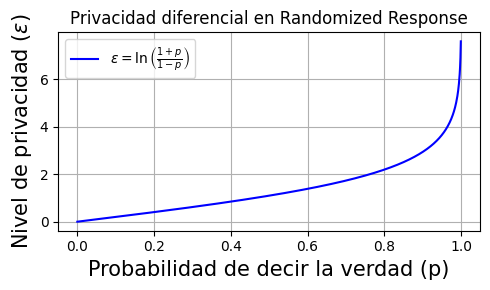

In [13]:
# YOUR CODE HERE

p_vals = np.linspace(0.001, 0.999, 1000)

epsilons = rr_epsilon(p_vals)

plt.figure(figsize=(5, 3))
plt.plot(p_vals, epsilons, label=r'$\varepsilon = \ln\left(\frac{1 + p}{1 - p}\right)$', color='blue')
plt.xlabel('Probabilidad de decir la verdad (p)',fontsize=15)
plt.ylabel('Nivel de privacidad ($\epsilon$)',fontsize=15)
plt.title('Privacidad diferencial en Randomized Response')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



- Describe the obtained plot in a few sentences. Does the plot coincides with your intuitions given in the previous question? How does increasing the probability $p$ affects the privacy level of the algorithm?

- YOUR ANSWER HERE

En efecto, a medida que crece la probabilidad de decir la verdad de la respuesta, el nivel de privacidad $\varepsilon$ tiende a infinito, lo que quiere decir que la privacidad no existe, y viceversa, si la probabilidad de decir la verdad tiende a cero, entonces la privacidad es perfecta en 0. Por lo que este gráfico coincide con nuestra intuición de la parte anterior.

## Question 4 (15 points)

Implement `decode_rand_resp_yes_no` that computes the unbiased estimator of `encode_rand_resp_yes_no`. Notice that this function is also parametrized by `p`, so the result seen in class 11 must be generalized from 0.5 to p.

_HINT_: (class 12, slide 15) -> What are the new values of `P[resp SI | ventas]` and `P[resp SI | no-ventas]`?

La fórmula que utilicé fue (utilizando p en vez de 0,5 para las probabilidades en el árbol de probabilidades):
$$\text{Pr}[\text{resp SI}| \text{ventas}]\cdot \text{Pr}[\text{ventas}]+ \text{Pr}[\text{resp SI}| \text{ no-ventas}]\cdot \text{Pr}[\text{no-ventas}] = \text{Pr}[\text{resp SI}]$$
$$\text{Pr}[\text{resp SI}| \text{ventas}]\cdot \text{Pr}[\text{ventas}]+ \text{Pr}[\text{resp SI}| \text{ no-ventas}]\cdot (1-\text{Pr}[\text{ventas}]) = \text{Pr}[\text{resp SI}]$$
$$\frac{N_{\text{actual SI}}}{N_{\text{total}}} \frac{1+p}{2} + \frac{(1-p)}{2}\cdot(1 - \frac{N_{\text{actual SI}}}{N_{\text{total}}})= \frac{N_{\text{reported SI}}}{N_{\text{total}}}$$
$$N_{\text{actual SI}} \frac{1+p}{2} + \frac{(1-p)}{2}\cdot( N_{\text{total}} - N_{\text{actual SI}})= N_{\text{reported SI}}$$
$$N_{\text{actual SI}} (\frac{1+p}{2}-\frac{1-p}{2}) + \frac{(1-p)}{2}\cdot N_{\text{total}} = N_{\text{reported SI}} $$
$$N_{\text{actual SI}} (\frac{2p}{2}) = N_{\text{reported SI}} - \frac{(1-p)}{2}\cdot N_{\text{total}}$$
$$N_{\text{actual SI}} = \frac{N_{\text{reported SI}} - \frac{(1-p)}{2}\cdot N_{\text{total}}}{p}$$

In [ ]:
def decode_rand_resp_yes_no(p, responses):
    """Esta función lo que hace es darnos el conteo 
    como un estimador insesgado de la cantidad de respuestas 
    positivas actuales

    Args:
        p: probabilidad de dar la respuesta correcta
        responses: respuestas correctas

    Returns:
        n_actual / p : estimador insesgado del conteo
    """
    n_total = len(responses) 
    n_reported = np.sum(responses)
    n_actual = n_reported - ((1-p)/2)*n_total
    return n_actual / p

# Example: 1000 "yesses" and 500 "nos"
true_responses = [True for _ in range(1000)] + [False for _ in range(500)]
print('Number of "True" yesses:', np.sum(true_responses))

# Randomized responses
# Each response satisfies 1.09-differential privacy
rand_responses = [encode_rand_resp_yes_no(0.8, r) for r in true_responses]

# Decode the responses by subtracting "fake" yesses
print('Decoded randomized response yesses:', decode_rand_resp_yes_no(0.8, rand_responses))

Number of "True" yesses: 1000
Decoded randomized response yesses: 1006.25


In [19]:
BASIC_P = 0.5

# TEST CASE
true_responses = [True for _ in range(1000)] + [False for _ in range(500)]

# Randomized responses
# Each response satisfies 1.09-differential privacy, QUE DE HECHO ES EL LOGARITMO NATURAL DE 3! como se dijo en clases
rand_responses = [encode_rand_resp_yes_no(BASIC_P, r) for r in true_responses]

# Decode the responses by subtracting "fake" yesses
assert decode_rand_resp_yes_no(BASIC_P, rand_responses) < 1100
assert decode_rand_resp_yes_no(BASIC_P, rand_responses) > 900

## Question 5 (5 points)

Implement the function `calc_rand_responses` that computes the unbiased estimator of the randomized response algorithm over a list of truthful responses. Additionally, implement `generate_rr_errors` that produces a list of length `n`, of percentual errors of RR.

In [24]:
def calc_rand_responses(p, true_responses):
    """Para cada respuesta en true_responses, se calcula la respuesta codificada
    y luego se calcula la suma de todas ellas, y el estimador insesgado, devolviendo
    un vector o lista de respuestas
    Input: 
        p: probabilidad de dar la respuesta correcta
        true_responses: respuestas correctas
    Output:
        n_actual_estimated: estimador estimado insesgado o unbiased"""
    n_total = len(true_responses)
    rand_responses = [encode_rand_resp_yes_no(p, r) for r in true_responses]
    n_reported_yes = np.sum(rand_responses)
    
    n_actual_estimated = (n_reported_yes - ((1 - p) / 2) * n_total) / p
    return n_actual_estimated

def generate_rr_errors(n, p, true_responses):
    """Esta función devuelve una lista con los errores porcentuales de 
    la cantidad de respuestas SÍ que la funcion calc_rand_responses da con
    respecto a las verdaderas respuestas.
    Input:
        n: cantidad de respuestas
        p: probabilidad de dar la verdadera respuesta
        true_responses: respuestas correctas
    Output: 
        errors: errores porcentuales de la cantidad total de sí's"""
    true_yes = np.sum(true_responses)
    errors = []

    for _ in range(n):
        estimated_yes = calc_rand_responses(p, true_responses)
        error_percent = abs(estimated_yes - true_yes) / true_yes * 100
        errors.append(error_percent)

    return errors

## Question 6 (4 points)

Observe the following plot:


Average error for p=0.25: 6.087999999999999
Average error for p=0.5: 2.747
Average error for p=0.75: 1.3003333333333333


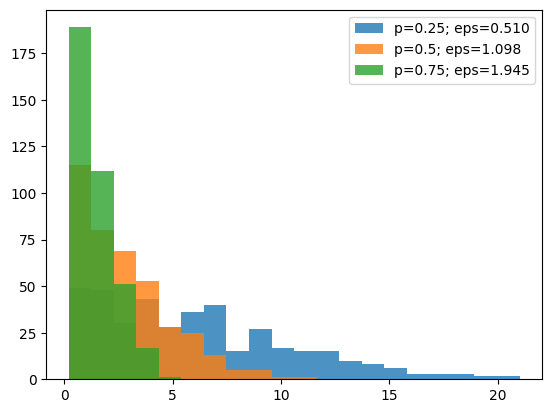

In [22]:
probabilities = [0.25, 0.5, 0.75]

bins = 20

for p in probabilities:
    errors = generate_rr_errors(400, p, true_responses)

    print("Average error for p=" + str(p) + ":", np.mean(errors))

    _, binsp, _ = plt.hist(errors, bins=bins, label='p=' + str(p) + '; eps=' + str(rr_epsilon(p))[0:5], alpha=0.8)

    bins = binsp

plt.legend()



- Describe the plot in a few sentences
- What properties of the randomized response algorithm can you observe?

- YOUR ANSWER HERE: Podemos ver del gráfico que, el $\varepsilon$ aumenta cuando aumenta la probabilidad aumenta, y también el error promedio disminuye cuando aumenta la probabilidad de dar la respuesta correcta. Es decir, cuando aumenta la probabilidad hay más casos en los que se obtienen valores o respuestas con errores menores al 5%, pero para una probabilidad de 75% (bastante alto!). 
- YOUR ANSWER HERE: La propiedad que podemos ver es el trade-off entre privacidad y utilidad: a medida que aumenta p aumenta también $\varepsilon$ (disminuye la privacidad). También, la propiedad que podemos ver es la de la distribución o dispersión de los errores: a mayor precisión en la respuesta (osea p más alta) tenemos menos privacidad y menor dispersión de errores (errores más bajos), pero cuando hay menos precisión en la respuesta (osea p más bajo) tenemos más privacidad y mayor dispersión de errores, osea, errores más grandes. 

## Unary enconding

These are the definitions provided in class:

In [25]:
domain = adult['Occupation'].dropna().unique()

p, q = .75, .25

def encode(response):
    return [1 if d == response else 0 for d in domain]

def perturb(p, q, encoded_response):
    return [perturb_bit(p, q, b) for b in encoded_response]

def perturb_bit(p, q, bit):
    sample = np.random.random()
    if bit == 1:
        if sample <= p:
            return 1
        else:
            return 0
    elif bit == 0:
        if sample <= q:
            return 1
        else:
            return 0

def aggregate(p, q, responses):
    sums = np.sum(responses, axis=0)
    n = len(responses)

    return [(v - n*q) / (p-q) for v in sums]

def unary_epsilon(p, q):
    return np.log((p*(1-q)) / ((1-p)*q))

## Question 7 (5 points)

Complete the definition of `unary_sales_count`, that returns a private answer to how many people work in 'Sales', using the unary encoding algorithm.

In [72]:
def unary_sales_count(p, q):
    """Esta función me da el estimador insesgado de la cantidad de personas
    que trabajan en ventas, usando el algoritmo Unary Coding. Recordar: 
    Este algoritmo es epsilon-Local Diferencialmente Privado
    Input:
        p: probabilidad de decir las personas que trabajan en ventas.
        q: probabilidad de no decir las personas que trabajan en ventas.
    Output: 
        conteo_privado: cantidad de personas que trabajan en ventas"""
    #En esta función primero filtramos las respuestas verdaderas para "Sales"
    verdaderas_respuestas = adult['Occupation'].dropna()
    #A continuación los pasos de la función o algoritmo:
    #Paso 1: Codificamos cada respuesta en vector unario, es decir, con 1's y 0's,
    #con la función encode
    respuestas_codificadas = [encode(r) for r in verdaderas_respuestas]
    
    #Paso 2: Perturbamos cada vector codificado con la función perturb
    respuestas_perturbadas = [perturb(p, q, er) for er in respuestas_codificadas]
    
    #Paso 3: Agregamos(deshacer el ruido) para obtener estimación privada de conteo,
    #con la función aggregate
    conteos_agregados = aggregate(p, q, respuestas_perturbadas)
    
    indice_de_venta = np.where(domain == 'Sales')[0][0]
    conteo_privado = conteos_agregados[indice_de_venta]

    return conteo_privado
unary_sales_count(p, q)#probamos para ver si funciona bien

3673.0

## Question 8 (6 points)

Write a script that plots the relative errors for 50 iterations of the laplace mechanism and the unary mechanism. Additionally, print the average error for both mechanisms.

_HINT_: Use `plt.subplot` to make 2 plots side-by-side.

In [69]:
errores_Laplace = []
errores_Unary_Coding = []

sensitivity = 1#la sensibilidad es 1 porque es un conteo.
epsilon = unary_epsilon(p,q)#usamos el mismo epsilon para ser justos.

Ocupaciones = adult['Occupation'].dropna()
verdadera_respuesta = np.sum(Ocupaciones == 'Sales')
print(verdadera_respuesta)

for i in range(50):
    resultado_Laplace = laplace_mech(verdadera_respuesta, sensitivity, epsilon)
    resultado_Unary_Coding = unary_sales_count(p, q)
    
    errores_Laplace.append(100 * abs(resultado_Laplace - verdadera_respuesta) / verdadera_respuesta)
    errores_Unary_Coding.append(100 * abs(resultado_Unary_Coding - verdadera_respuesta) / verdadera_respuesta)


3650


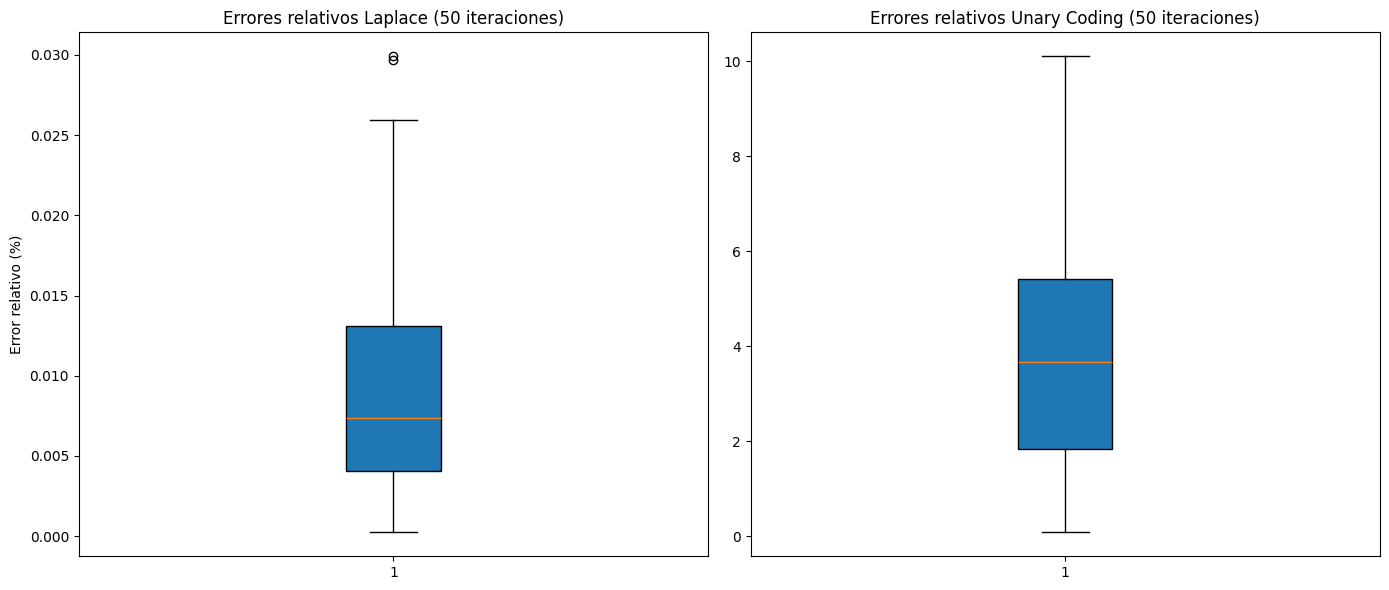

Error promedio Laplace: 0.01%
Error promedio Unary Coding: 3.55%


In [73]:
#Hacemos boxplots para poder comparar la mediana (cuartil 2) con los máximos, mínimos y outliers.
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].boxplot(errores_Laplace, patch_artist=True)
axs[0].set_title('Errores relativos Laplace (50 iteraciones)')
axs[0].set_ylabel('Error relativo (%)')

axs[1].boxplot(errores_Unary_Coding, patch_artist=True)
axs[1].set_title('Errores relativos Unary Coding (50 iteraciones)')

plt.tight_layout()
plt.show()

print(f"Error promedio Laplace: {np.mean(errores_Laplace):.2f}%")
print(f"Error promedio Unary Coding: {np.mean(errores_Unary_Coding):.2f}%")

## Question 9 (4 points)

Analyze the plot of the previous question:

- How do the accuracies of both mechanisms compare?
- Besides the difference of accuracy between the two mechanisms, what is the primary guarantee that unary encoding offers over the laplace mechanism?

YOUR ANSWER HERE
1) En general el mecanismo de Laplace es más preciso para el mismo epsilon, aunque el mecanismo de Unary Coding no usa el parámetro de sensibilidad. El primero tiene un error promedio de 0.01%, dos órdenes de magnitud más pequeño que el de Unary Coding (3.55%). Igualmente ambos son muy bajos (y por ende muy precisos). Como podemos ver, el mecanismo de Laplace presenta algunos outliers, mientras que el mecanismo Unary Coding, no. 

2) Lo que tiene de bueno Unary Coding es que está diseñado para operar bajo el modelo de privacidad diferencial local, donde cada usuario perturba su propio dato antes de enviarlo a un servidor o analista. Esto significa que no se requiere confiar en un servidor central para garantizar privacidad, a diferencia del mecanismo de Laplace, que típicamente se aplica en un entorno centralizado donde los datos se recogen primero y luego se agregan con ruido.

Además es especialmente útil para datos categóricos con múltiples categorías (como ocupaciones, preferencias, etc.). Codifica cada categoría como un vector binario (one-hot) y perturba cada bit, permitiendo estimar distribuciones sobre categorías, mientras que Laplace se suele aplicar directamente a conteos numéricos.

Al no compartir el dato real sino una versión aleatoriamente perturbada localmente, Unary Coding protege mejor la privacidad de cada usuario incluso si el servidor es malicioso o vulnerado (es decir, aún con el mismo presupuesto $\varepsilon$ hay mayor privacidad).

En sistemas con millones de usuarios, Unary Coding permite recopilar datos con privacidad local sin comprometer la escalabilidad o confianza en el servidor central. Por ende, si bien tenemos un poco menos de utilidad, no es mucho menos considerando que queremos mantener la privacidad, porque la privacidad es más necesaria. 
 
*** *Es decir, es mejor un poco más de privacidad que un poco más de utilidad.* ***